In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.4 MB/s eta 0:00:00


In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-08-19 15:10:16--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20fi

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
#[출처] NameError: name 'Tagger' is not defined (부제: 왜 갑자기 잘되던 Mecab이 안되는 걸까?)|작성자 존이

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=9a72ce9c713f98e7de1b725d9f2208f97503e2fa899824c97d17a288afd9208f
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

여기까지 실행 후 런타임 다시 실행 -> 코랩에서 MECAB 활용의 오류

필요한 것 Import

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from konlpy.tag import Mecab
mecab = Mecab()
from tqdm import tqdm
import re
from gensim import corpora
import gensim
import pyLDAvis.gensim_models
from collections import Counter
import pandas as pd
import numpy as np
import re

import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import time
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


데이터 불러오기

In [ ]:
dataset_raw1 = pd.read_csv('/content/drive/MyDrive/논문준비/toss.csv',encoding='cp949')
dataset_raw3 = pd.read_csv('/content/drive/MyDrive/논문준비/kbank.csv',encoding='cp949')
dataset_raw4 = pd.read_csv('/content/drive/MyDrive/논문준비/카카오뱅크특허.csv',encoding='cp949')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs = [dataset_raw1, dataset_raw3,dataset_raw4]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[    Unnamed: 0  Application_No Application_Date   Applicant    Legal_State  \
 0            0    1.020140e+12       2014.05.15  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 1            1    1.020180e+12       2018.02.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 2            2    1.020200e+12       2020.04.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 3            3    1.020150e+12       2015.05.12  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 4            4    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 5            5    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 6            6    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 7            7    1.020160e+12       2016.05.18  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 8            8    1.020220e+12       2022.03.28  (주)비바리퍼블리카             등록   
 9            9    1.020210e+12       2021.02.02  (주)비바리퍼블리카             등록   
 10          10    1.020210e+12       2021.07.09  (주)비바리퍼블리카             공개   
 11          11    1.020210e+12       2021.07.09  (주

불러온 것 합치기

In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


필요한 내용만 남기기 IPC기준 G06Q,G06F

In [ ]:
def filter_values(value):
    return 'G06Q' in value and 'G06F' in value

# 조건에 맞는 값만 남기기
dataset_raw = dataset_raw[dataset_raw['IPC'].apply(filter_values)]

# 결과 출력
print(dataset_raw)

    Unnamed: 0  Application_No Application_Date   Applicant    Legal_State  \
1          1.0    1.020180e+12       2018.02.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
2          2.0    1.020200e+12       2020.04.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
3          3.0    1.020150e+12       2015.05.12  (주)비바리퍼블리카  등록 (권리 변동 있음)   
4          4.0    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
6          6.0    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
7          7.0    1.020160e+12       2016.05.18  (주)비바리퍼블리카  등록 (권리 변동 있음)   
1          1.0    1.020160e+12       2016.06.13   주식회사 케이뱅크             등록   
1          NaN    1.020200e+12       2020.08.06  주식회사 카카오뱅크             등록   
4          NaN    1.020210e+12       2021.07.20  주식회사 카카오뱅크             등록   
10         NaN    1.020200e+12       2020.08.26  주식회사 카카오뱅크             등록   
16         NaN    1.020220e+12       2022.01.21  주식회사 카카오뱅크             등록   
24         NaN    1.020200e+12       2020.06.29  주식회사 카카오뱅크     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Application_No,Application_Date,Applicant,Legal_State,PatentName_Kor,PatentName_Eng,IPC,CPC,Applicant_Count,Applicant_Nationality_Count,Inventor_Count,Inventor_Nationality_Count,Claim_Count,Family_Count,Expiration_Date,Summary_Text,Claim_Text
1,1.0,1.020180e+12,2018.02.13,(주)비바리퍼블리카,등록 (권리 변동 있음),카드사의 유저정보 스크래핑 방법 및 이를 위한 애플리케이션 시스템,Method for scrapping user information of card-...,G06Q 20/34(2012.01.01) G06Q 20/38(2012.01.01)...,G06Q 20/356(2013.01) G06Q 20/382(2013.01) G06...,1,1,3,1,13,1,NaN,유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...,카드사 시스템의 계정에 로그인해야 확인할 수 있는 카드사의 유저정보를 스크래핑하기...
2,2.0,1.020200e+12,2020.04.13,(주)비바리퍼블리카,등록 (권리 변동 있음),유저정보 스크래핑 방법 및 이를 위한 애플리케이션 시스템,Method for scrapping user information and appl...,G06F 21/62(2013.01.01) G06F 21/31(2013.01.01)...,G06F 21/62(2013.01) G06F 21/31(2013.01) G06Q ...,1,1,3,1,9,1,NaN,유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...,제1대상기관의 계정에 로그인해야 확인할 수 있는 제1대상기관 유저정보를 스크래핑하...
3,3.0,1.020150e+12,2015.05.12,(주)비바리퍼블리카,등록 (권리 변동 있음),금융서비스 제공방법 및 금융서비스 시스템,Providing method for financial service and fin...,G06Q 40/02(2023.01.01) G06F 21/31(2013.01.01)...,G06Q 40/02(2023.01) G06F 21/31(2013.01) H04L ...,1,1,5,1,18,2,NaN,금융서비스 제공방법 및 이를 위한 시스템이 개시된다. 상기 금융서비스 제공방법은 금...,금융서비스 시스템이 유저 단말기로부터 인증의 대상이 되는 계좌의 계좌정보를 수신하...
4,4.0,1.020170e+12,2017.08.31,(주)비바리퍼블리카,등록 (권리 변동 있음),유저정보 스크래핑 방법 및 이를 위한 애플리케이션 시스템,Method for scrapping user information and appl...,G06F 21/62(2013.01.01) G06F 21/31(2013.01.01)...,G06F 21/62(2013.01) G06F 21/31(2013.01) G06Q ...,1,1,3,1,24,1,NaN,유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...,제1대상기관의 계정에 로그인해야 확인할 수 있는 제1대상기관 유저정보를 스크래핑하...
6,6.0,1.020170e+12,2017.08.31,(주)비바리퍼블리카,등록 (권리 변동 있음),카드사의 유저정보 스크래핑 방법 및 이를 위한 애플리케이션 시스템,Method for scrapping user information of card-...,G06Q 20/34(2012.01.01) G06Q 20/38(2012.01.01)...,G06Q 20/356(2013.01) G06Q 20/382(2013.01) G06...,1,1,3,1,13,1,NaN,유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...,카드사 시스템의 계정에 로그인해야 확인할 수 있는 카드사의 유저정보를 스크래핑하기...
7,7.0,1.020160e+12,2016.05.18,(주)비바리퍼블리카,등록 (권리 변동 있음),금융서비스 제공방법 및 금융서비스 시스템,Providing method for financial service and fin...,G06Q 40/02(2023.01.01) G06F 21/31(2013.01.01)...,G06Q 40/02(2023.01) G06F 21/31(2013.01) H04L ...,1,1,5,1,5,2,NaN,금융서비스 제공방법 및 이를 위한 시스템이 개시된다. 상기 금융서비스 제공방법은 금...,금융서비스 시스템이 유저 단말기로부터 인증의 대상이 되는 계좌의 계좌정보를 수신하...
1,1.0,1.020160e+12,2016.06.13,주식회사 케이뱅크,등록,모바일 뱅킹 프로그램을 이용한 다계좌 연동 운용 시스템 및 방법,SYSTEM AND METHOD FOR MANAGING MULTI ACCOUNT I...,G06Q 40/02(2023.01.01) G06Q 20/10(2012.01.01)...,G06Q 40/02(2023.01) G06Q 20/10(2013.01) G06Q ...,1,1,4,1,8,0,NaN,모바일 뱅킹 프로그램을 이용한 다계좌 연동 운용 시스템 및 방법이 제시된다. 본 발...,각각의 이동통신 단말기로 모바일 뱅킹 프로그램을 지원하는 모바일 뱅킹 프로그램지원...
1,NaN,1.020200e+12,2020.08.06,주식회사 카카오뱅크,등록,신경망을 이용한 영상통화 기반의 인증 모니터링 방법 및 시스템,Method for monitoring authentication based on ...,G06Q 30/02(2023.01.01) H04N 7/14(2006.01.01) ...,G06Q 30/0281(2013.01) H04N 7/141(2013.01) G06...,1,1,1,1,13,0,NaN,"본 발명은 신경망을 이용한 영상통화 기반의 인증 모니터링 방법으로, 사용자의 안면 ...",상담 서버에서 수행되는 신경망을 이용한 영상통화 기반의 인증 모니터링 방법에 있어...
4,NaN,1.020210e+12,2021.07.20,주식회사 카카오뱅크,등록,사용자 단말을 이용한 출금 방법 및 이를 제공하는 서버,Method for withdrawal service using user devic...,G06Q 40/02(2023.01.01) G06Q 20/10(2012.01.01)...,G06Q 40/02(2023.01) G06Q 20/1085(2013.01) G06...,1,1,8,1,14,0,NaN,본 발명은 사용자 단말을 이용한 출금 방법에 관한 것으로 본 발명에 따른 사용자 단...,"뱅킹 서버에서 수행되는 사용자 단말을 이용한 출금 방법에 있어서,중개 서버의 출금..."
10,NaN,1.020200e+12,2020.08.26,주식회사 카카오뱅크,등록,애니메이션 효과를 이용한 이벤트 제공 방법,Method for providing event using animation effect,G06Q 30/02(2023.01.01) G06Q 40/02(2023.01.01)...,G06Q 30/02(2023.01) G06Q 40/02(2023.01) G06Q ...,1,1,19,1,13,0,NaN,"본 발명은 이벤트 제공 방법을 개시한다. 상기 이벤트 제공 방법은, 사용자의 계정에...","사용자 단말기와 연계된 금융사 서버에서 수행되는 이벤트 제공 방법에 있어서,사용자..."


In [ ]:
dataset_raw.isnull().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                     71
Application_No                  0
Application_Date                0
Applicant                       0
Legal_State                     0
PatentName_Kor                  0
PatentName_Eng                  0
IPC                             0
CPC                             0
Applicant_Count                 0
Applicant_Nationality_Count     0
Inventor_Count                  0
Inventor_Nationality_Count      0
Claim_Count                     0
Family_Count                    0
Expiration_Date                94
Summary_Text                    0
Claim_Text                      0
dtype: int64

불용어 리스트 불러오기

In [ ]:
stopword_list = pd.read_excel('/content/drive/MyDrive/논문준비/stopword.xlsx')
stopword_list.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
1066,대상
1067,금액
1068,한도
1069,동단
1070,요금


In [ ]:
Patent_pos = dataset_raw['Summary_Text']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     전자적 정보와 실제 자금을 분리하여 처리하는 금융 서비스 방법 및 시스템이 개시된다...
1     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
2     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
3     금융서비스 제공방법 및 이를 위한 시스템이 개시된다. 상기 금융서비스 제공방법은 금...
4     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
                            ...                        
66    본 발명은 스크래핑 자동화 방법 및 이를 수행하는 서버에 대한 것이다. 상기 스크래...
67    본 발명은 매트릭스 연산을 이용한 안면유사도 산출 시스템 및 방법을 개시한다. 상기...
68    본 발명에 따른 멀티 트랜잭션을 이용한 업무 컴포넌트 격리 개발 시스템 및 방법에 ...
69    본 발명은 수익률 표시 방법을 개시한다. 상기 수익률 표시 방법은, 사용자 단말기와...
70    본 발명은 모금통장 및 모금페이지 운영 방법에 관한 것이다. 상기 모금통장 및 모금...
Name: Summary_Text, Length: 101, dtype: object

In [ ]:
Patent_tokenized_pos = list(map(lambda patent: mecab.nouns(patent), Patent_pos))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


함수들 선언, 불용어, Topicmodeling...

In [ ]:
def remove_stopword(tokens):
    Patent_removed_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상인 경우
        if 1 < len(token):
            # 토큰이 불용어가 아닌 경우만 분석용 리뷰 데이터로 포함
            if token not in list(stopword_list['stopword']):
                Patent_removed_stopword.append(token)

    return Patent_removed_stopword
def lda_modeling(Patent_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(Patent_prep)
    corpus = [dictionary.doc2bow(Patent) for Patent in Patent_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES,
                                            iterations= ITER)
    return model, corpus, dictionary

def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('topic_prop.xlsx', index=True)

    display(topic_prop)

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stopword(tokens):
    Patent_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상인 경우
        if 1 < len(token):
            # 토큰이 불용어가 아닌 경우만 분석용 리뷰 데이터로 포함
            if token not in list(stopword_list['stopword']):
                Patent_stopword.append(token)

    return Patent_stopword

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ITER = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_tokenized_pos = list(map(lambda patent: mecab.nouns(patent), Patent_pos))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_removed_stopword_pos = list(map(lambda tokens : remove_stopword(tokens), Patent_tokenized_pos))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_prep_pos = Patent_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_num_pos = len(Patent_prep_pos)


print(f"분석한 특허 총 개수: {Patent_num_pos}")


분석한 특허 총 개수: 101


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_prep_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['자금',
  '분리',
  '시스템',
  '개시',
  '시스템',
  '수행',
  '계좌',
  '등록',
  '단말기',
  '송금',
  '대상자',
  '전화',
  '송금',
  '송금',
  '네트워크',
  '수신',
  '전화',
  '송금',
  '대상자',
  '단말기',
  '계좌',
  '입력',
  '링크',
  '링크',
  '입력',
  '계좌',
  '송금',
  '입금',
  '자금',
  '관리',
  '시스템',
  '전송',
  '송금',
  '기반',
  '출금',
  '자금',
  '관리',
  '시스템',
  '전송',
  '자금',
  '관리',
  '시스템',
  '입금',
  '계좌',
  '송금',
  '입금',
  '출금',
  '계좌',
  '정산',
  '출금'],
 ['유저',
  '래핑',
  '시스템',
  '개시',
  '유저',
  '래핑',
  '유저',
  '단말기',
  '설치',
  '시스템',
  '유저',
  '유저',
  '비밀',
  '세트',
  '단말기',
  '유저',
  '명의',
  '단말기',
  '전화',
  '성별',
  '내국',
  '생년월일',
  '통신사',
  '세트',
  '획득',
  '시스템',
  '입력',
  '세트',
  '세트',
  '로그인',
  '필요',
  '인증',
  '시스템',
  '인증',
  '설정',
  '시스템',
  '설정',
  '시스템',
  '인증',
  '유저',
  '계정',
  '로그인',
  '시스템',
  '계정',
  '로그인',
  '유저',
  '래핑',
  '래핑',
  '프로세스',
  '수행'],
 ['유저',
  '래핑',
  '시스템',
  '개시',
  '유저',
  '래핑',
  '기관',
  '계정',
  '로그인',
  '기관',
  '유저',
  '래핑',
  '유저',
  '래핑',
  '유저',
  '단말기',
  '설치',
  '시스템',
  '유저',
  '로그인',
  '변

In [ ]:
# Dictionary 객체 생성
texts = Patent_prep_pos
dictionary = Dictionary(texts)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in texts]
texts = Patent_prep_pos


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


최적의 토픽수 및 단어수 설정

In [ ]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, texts, num_topics, num_words):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=1000,iterations=1000)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

num_topics_range = [5, 10, 15,20,25]
num_words_range = [5, 10, 15]

coherence_scores = []

for num_topics in num_topics_range:
    for num_words in num_words_range:

        coherence = compute_coherence_values(corpus, dictionary, texts, num_topics=num_topics, num_words=num_words)
        coherence_scores.append((num_topics, num_words, coherence))


for num_topics, num_words, coherence in coherence_scores:
    print(f"Number of Topics: {num_topics}, Number of Words: {num_words}, Coherence Score: {coherence}")


x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 5, Number of Words: 5, Coherence Score: 0.427720186417518
Number of Topics: 5, Number of Words: 10, Coherence Score: 0.41073911655992557
Number of Topics: 5, Number of Words: 15, Coherence Score: 0.35923866208877353
Number of Topics: 10, Number of Words: 5, Coherence Score: 0.41497993322290955
Number of Topics: 10, Number of Words: 10, Coherence Score: 0.37341533906281266
Number of Topics: 10, Number of Words: 15, Coherence Score: 0.3998648520209228
Number of Topics: 15, Number of Words: 5, Coherence Score: 0.3788653512865477
Number of Topics: 15, Number of Words: 10, Coherence Score: 0.39437976994232943
Number of Topics: 15, Number of Words: 15, Coherence Score: 0.3827009316248964
Number of Topics: 20, Number of Words: 5, Coherence Score: 0.41109017459757713
Number of Topics: 20, Number of Words: 10, Coherence Score: 0.4510639151830741
Number of Topics: 20, Number of Words: 15, Coherence Score: 0.43046042355629377
Number of Topics: 25, Number of Words: 5, Coherence S

NameError: ignored

In [ ]:
NUM_TOPICS = 20 # 토픽 개수는 하이퍼파라미터
PASSES = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
NUM_WORDS = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
NUM_WORDS = 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_num,word_prop
0,1,"0.162*""이미지"" + 0.143*""신경망"" + 0.101*""신분증"" + 0.07..."
1,2,"0.088*""업무"" + 0.046*""관리"" + 0.036*""서버"" + 0.029*""..."
2,3,"0.138*""신분증"" + 0.081*""인식"" + 0.077*""모델"" + 0.041*..."
3,4,"0.188*""출금"" + 0.066*""인증"" + 0.066*""기기"" + 0.066*""..."
4,5,"0.089*""업무"" + 0.088*""변경"" + 0.053*""레이블링"" + 0.049..."
5,6,"0.221*""계좌"" + 0.080*""관리"" + 0.071*""개설"" + 0.037*""..."
6,7,"0.108*""수취인"" + 0.072*""이체"" + 0.060*""사기"" + 0.037*..."
7,8,"0.149*""적금"" + 0.075*""계좌"" + 0.048*""횟수"" + 0.041*""..."
8,9,"0.072*""이체"" + 0.068*""검출"" + 0.041*""그룹"" + 0.040*""..."
9,10,"0.079*""인증"" + 0.074*""서버"" + 0.053*""거래"" + 0.045*""..."


In [ ]:
lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.display import display, HTML

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    display(HTML('lda_visualization.html'))

lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
lda_visualize(model, corpus, dictionary, "all")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 주어진 문서에 대한 토픽 분포 추출
def get_document_topic_distribution(model, corpus):
    topic_dist = []
    for doc in corpus:
        doc_topic_dist = [0] * model.num_topics
        topics = model[doc]
        for topic in topics:
            topic_idx = topic[0]
            topic_prob = topic[1]
            doc_topic_dist[topic_idx] = topic_prob
        topic_dist.append(doc_topic_dist)
    return topic_dist
lda_topic_dist = get_document_topic_distribution(model, corpus)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_topic_dist = get_document_topic_distribution(model, corpus)

print("Document Topic Distribution:")
for i, doc_topic_dist in enumerate(lda_topic_dist):
    print(f"Document {i+1}: {doc_topic_dist}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document Topic Distribution:
Document 1: [0, 0, 0.73692334, 0, 0.25128204]
Document 2: [0, 0, 0, 0, 0.96597457]
Document 3: [0, 0, 0.09701777, 0.50860727, 0.3861356]
Document 4: [0, 0.94475555, 0, 0.044393145, 0]
Document 5: [0.8901961, 0, 0, 0.09762981, 0]
Document 6: [0, 0, 0, 0, 0.9894236]
Document 7: [0, 0, 0.55770826, 0.098463096, 0.33726278]
Document 8: [0, 0.98857605, 0, 0, 0]
Document 9: [0, 0, 0.98398834, 0, 0]
Document 10: [0.9797088, 0, 0, 0, 0]
Document 11: [0, 0.16705345, 0.82123035, 0, 0]
Document 12: [0, 0, 0, 0, 0.9883592]
Document 13: [0, 0, 0.41689846, 0.14589259, 0.4324296]
Document 14: [0, 0, 0.95376545, 0, 0.039838903]
Document 15: [0.1452969, 0, 0.58100444, 0.26781887, 0]
Document 16: [0, 0, 0, 0.9920558, 0]
Document 17: [0, 0.020693064, 0, 0.9560764, 0.019751733]
Document 18: [0, 0, 0, 0, 0.98894507]
Document 19: [0, 0.37873888, 0, 0.09125098, 0.5236094]
Document 20: [0.681666, 0, 0, 0, 0.3104048]
Document 21: [0, 0.9817749, 0, 0, 0]
Document 22: [0, 0.90626997, 

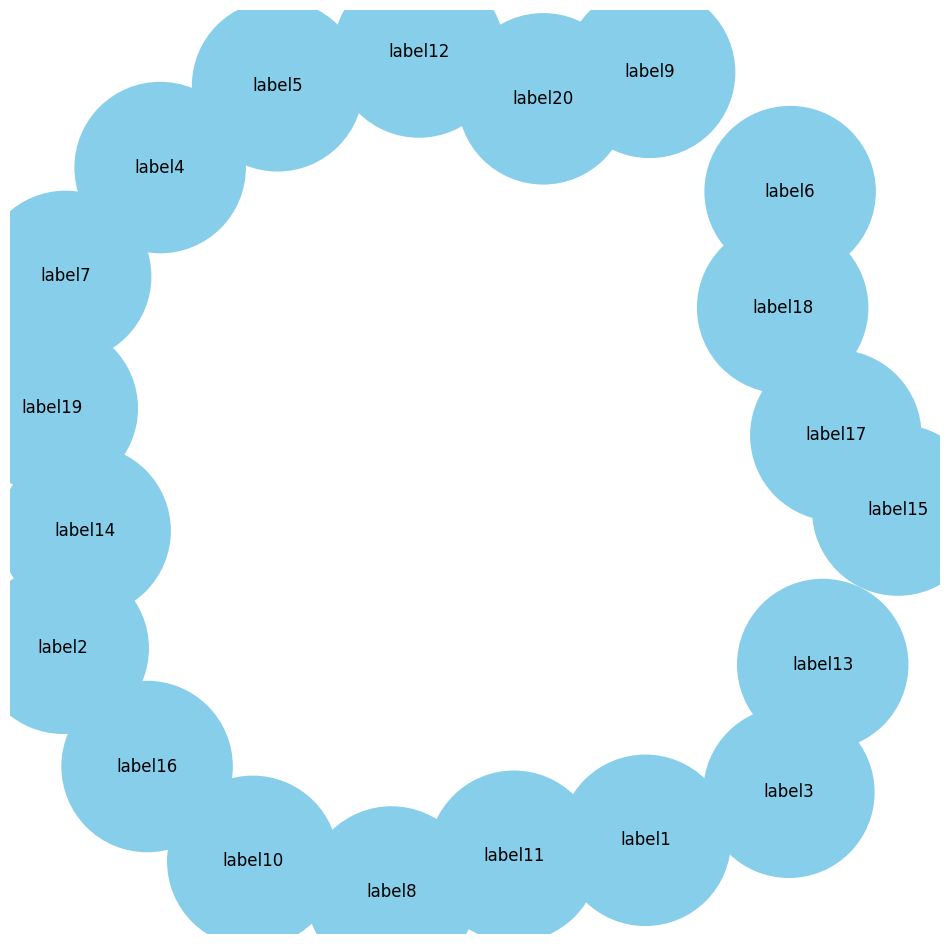

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# 토픽 정보 (노드 라벨 및 가중치)
topics = {
    1: {
        "label": "label1",
        "weights": {
            "이미지": 0.162,
            "신경망": 0.143,
            "신분증": 0.101,
            "학습": 0.074,
            "인식": 0.061
        }
    },
    2: {
        "label": "label2",
        "weights": {
            "업무": 0.088,
            "관리": 0.046,
            "서버": 0.036,
            "아이템": 0.029,
            "실행": 0.026
        }
    },
    3: {
        "label": "label3",
        "weights": {
            "신분증": 0.138,
            "인식": 0.081,
            "모델": 0.077,
            "여유": 0.041,
            "자금": 0.041
        }
    },
    4: {
        "label": "label4",
        "weights": {
            "출금": 0.188,
            "인증": 0.066,
            "기기": 0.066,
            "코드": 0.066,
            "중개": 0.056
        }
    },
    5: {
        "label": "label5",
        "weights": {
            "업무": 0.089,
            "변경": 0.088,
            "레이블링": 0.053,
            "기록": 0.049,
            "탄력": 0.044
        }
    },
    6: {
        "label": "label6",
        "weights": {
            "계좌": 0.221,
            "관리": 0.080,
            "개설": 0.071,
            "에이전트": 0.037,
            "단말기": 0.034
        }
    },
    7: {
        "label": "label7",
        "weights": {
            "수취인": 0.108,
            "이체": 0.072,
            "사기": 0.060,
            "점수": 0.037,
            "위험": 0.037
        }
    },
    8: {
        "label": "label8",
        "weights": {
            "적금": 0.149,
            "계좌": 0.075,
            "횟수": 0.048,
            "현황": 0.041,
            "개설": 0.041
        }
    },
    9: {
        "label": "label9",
        "weights": {
            "이체": 0.072,
            "검출": 0.068,
            "그룹": 0.041,
            "계좌": 0.040,
            "서버": 0.033
        }
    },
    10: {
        "label": "label10",
        "weights": {
            "인증": 0.079,
            "서버": 0.074,
            "거래": 0.053,
            "수신": 0.045,
            "모금": 0.029
        }
    },
    11: {
        "label": "label11",
        "weights": {
            "인증": 0.071,
            "단말기": 0.068,
            "신분증": 0.067,
            "수신": 0.062,
            "계좌": 0.054
        }
    },
    12: {
        "label": "label12",
        "weights": {
            "대출": 0.073,
            "입력": 0.057,
            "숫자": 0.048,
            "서버": 0.037,
            "오감": 0.032
        }
    },
    13: {
        "label": "label13",
        "weights": {
            "거래": 0.109,
            "송금": 0.084,
            "서버": 0.055,
            "수신": 0.036,
            "해외": 0.034
        }
    },
    14: {
        "label": "label14",
        "weights": {
            "콘텐츠": 0.062,
            "디지털": 0.046,
            "가입자": 0.043,
            "서버": 0.039,
            "지원": 0.027
        }
    },
    15: {
        "label": "label15",
        "weights": {
            "결제": 0.152,
            "서버": 0.078,
            "대행": 0.051,
            "인증": 0.047,
            "수신": 0.042
        }
    },
    16: {
        "label": "label16",
        "weights": {
            "유저": 0.093,
            "시스템": 0.083,
            "래핑": 0.057,
            "로그인": 0.050,
            "인증": 0.035
        }
    },
    17: {
        "label": "label17",
        "weights": {
            "지수": 0.064,
            "수신": 0.056,
            "자동": 0.048,
            "수익": 0.048,
            "스펀": 0.040
        }
    },
    18: {
        "label": "label18",
        "weights": {
            "계좌": 0.063,
            "터치": 0.053,
            "마스킹": 0.032,
            "서버": 0.032,
            "레이어": 0.032
        }
    },
    19: {
        "label": "label19",
        "weights": {
            "인증": 0.109,
            "산출": 0.088,
            "신분": 0.082,
            "유사": 0.079,
            "동일": 0.058
        }
    },
    20: {
        "label": "label20",
        "weights": {
            "지원": 0.038,
            "뱅킹": 0.038,
            "계좌": 0.035,
            "모바일": 0.035,
            "프로그램": 0.035
        }
    },
}




In [ ]:
topic_relations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

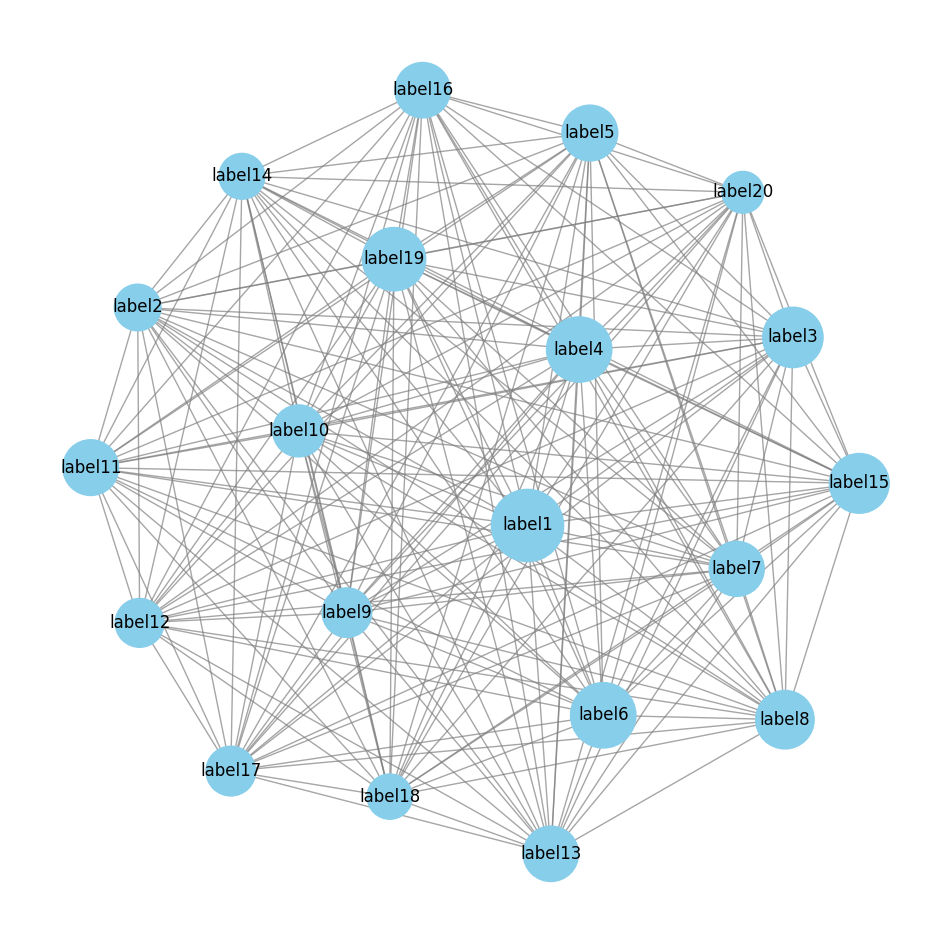

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations



# 토픽 간의 연관성을 측정하여 엣지 생성
topic_relations = []

# 토픽 간의 모든 조합에 대해 연관성 측정
for topic1, topic2 in combinations(topics.keys(), 2):
    # Jaccard 유사도 계산 (토픽 단어 가중치 간의 유사성 측정)
    weights1 = topics[topic1]["weights"]
    weights2 = topics[topic2]["weights"]

    # 두 토픽 간의 가중치 유사도 계산 (토픽 간의 연결 여부 결정)
    similarity = sum(w1 * w2 for w1, w2 in zip(weights1.values(), weights2.values()))

    # 임계값 (예: 0.1) 이상인 경우에만 연결
    if similarity >= 0.001:
        topic_relations.append((topic1, topic2))

# 그래프 생성
G = nx.Graph()

# 노드 추가 및 연결 중심성 계산
node_sizes = []
for topic_id, topic_info in topics.items():
    G.add_node(topic_id, label=topic_info["label"])
    # 가중치 합을 통해 노드 크기 설정
    total_weight = sum(topic_info["weights"].values())
    node_sizes.append(total_weight * 5000)  # 크기를 더 크게 조절해보세요.

# 엣지 추가
G.add_edges_from(topic_relations)

# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
node_labels = nx.get_node_attributes(G, "label")  # 노드 라벨

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.show()


In [ ]:
!pip install python-louvain

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install community

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2137 sha256=ed60bf5e9358ceb0376c42d6327953ccd80cb3392e9194609ae2c65f28bb4f95
  Stored in directory: /root/.cache/pip/wheels/5a/c2/f0/b7bbccbe452e1abf93281a168dac809b5bfafd0cb97997ced2
Successfully built community


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import community  # python-louvain 라이브러리

In [ ]:
!pip install python-louvain --upgrade


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


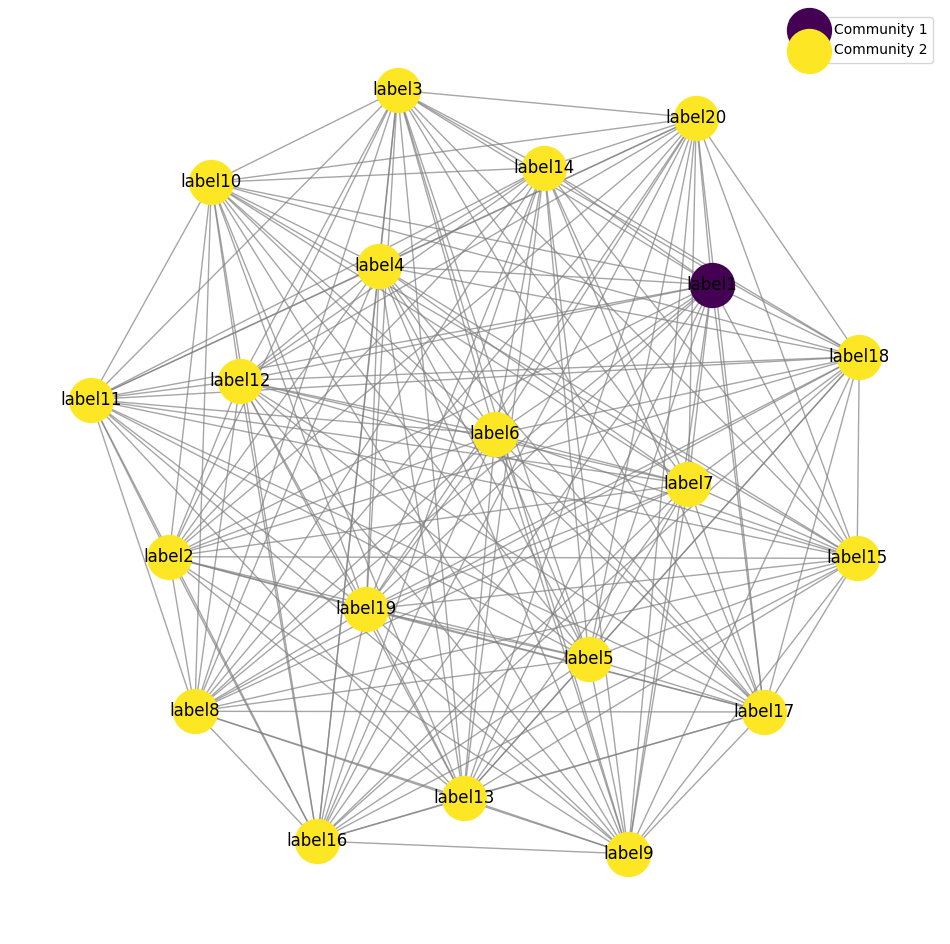

커뮤니티 정보:
커뮤니티 1: label1
커뮤니티 2: label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12, label13, label14, label15, label16, label17, label18, label19, label20


In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
import community

# 커뮤니티 탐지 (greedy_modularity 알고리즘 사용)
communities_generator = nx.algorithms.community.girvan_newman(G)
communities = next(communities_generator)

# 그래프 시각화 (커뮤니티별로 다른 색상 적용)
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정

plt.figure(figsize=(12, 12))
cmap = plt.get_cmap('viridis', len(communities))
node_colors = [cmap(i) for i in range(len(communities))]

for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(com), node_color=node_colors[i], node_size=1000, label=f'Community {i+1}')

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.legend()
plt.show()

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, com in enumerate(communities):
    print(f"커뮤니티 {i+1}: {', '.join([node_labels[node] for node in com])}")



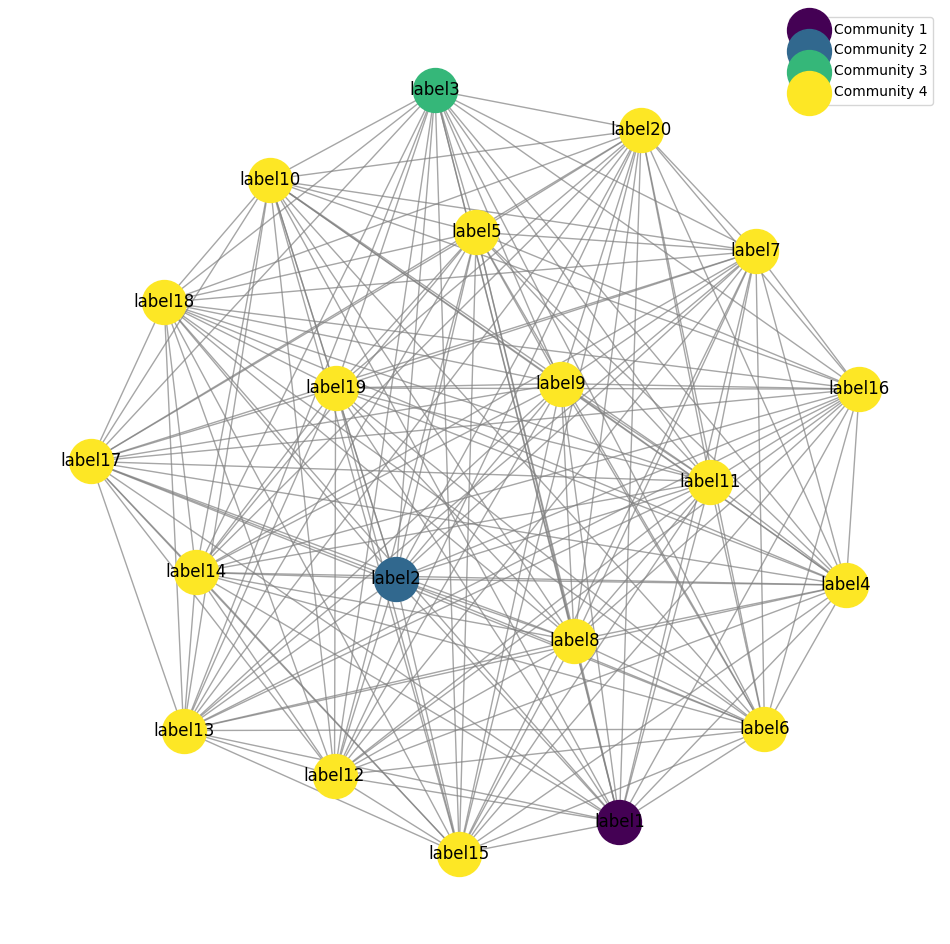

커뮤니티 정보:
커뮤니티 1: label1
커뮤니티 2: label2
커뮤니티 3: label3
커뮤니티 4: label4, label5, label6, label7, label8, label9, label10, label11, label12, label13, label14, label15, label16, label17, label18, label19, label20


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

# Girvan-Newman 알고리즘으로 커뮤니티 탐지 (3단계로 나눠서 실행)
k = 3  # 원하는 커뮤니티 수
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    communities = list(communities)

# 그래프 시각화 (커뮤니티별로 다른 색상 적용)
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정

plt.figure(figsize=(12, 12))
cmap = plt.get_cmap('viridis', len(communities))
node_colors = [cmap(i) for i in range(len(communities))]

for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(com), node_color=node_colors[i], node_size=1000, label=f'Community {i+1}')

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.legend()
plt.show()

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, com in enumerate(communities):
    print(f"커뮤니티 {i+1}: {', '.join([node_labels[node] for node in com])}")


In [ ]:
!pip install python-igraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00


In [ ]:
import igraph as ig


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# 그래프 생성 (이전 코드에서 생성한 그래프 사용)
# G = nx.Graph()

# Louvain 알고리즘을 사용하여 커뮤니티 검출
communities = list(community.label_propagation_communities(G))

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, com in enumerate(communities):
    com_str = ', '.join(map(str, com))  # 노드를 문자열로 변환
    print(f"커뮤니티 {i+1}: {com_str}")


커뮤니티 정보:
커뮤니티 1: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
